In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
#load audio files
debussy_file = "audio/debussy.wav"
redhot_file = "audio/redhot.wav"
duke_file = "audio/duke.wav"


In [10]:
debussy, _ = librosa.load(debussy_file)
duke, _ = librosa.load(duke_file)
redhot, _ = librosa.load(redhot_file)

duke.size

661500

In [14]:
# extract RMSE with librosa

FRAME_LENGTH = 1024
HOP_LENGTH = 512

rms_debussy = librosa.feature.rms(y=debussy, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_redhot = librosa.feature.rms(y=redhot, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_duke = librosa.feature.rms(y=duke, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

rms_duke

array([0.03837853, 0.0602421 , 0.0598342 , ..., 0.09259744, 0.09614703,
       0.09456893], dtype=float32)

In [6]:
rms_debussy.shape

(1292,)

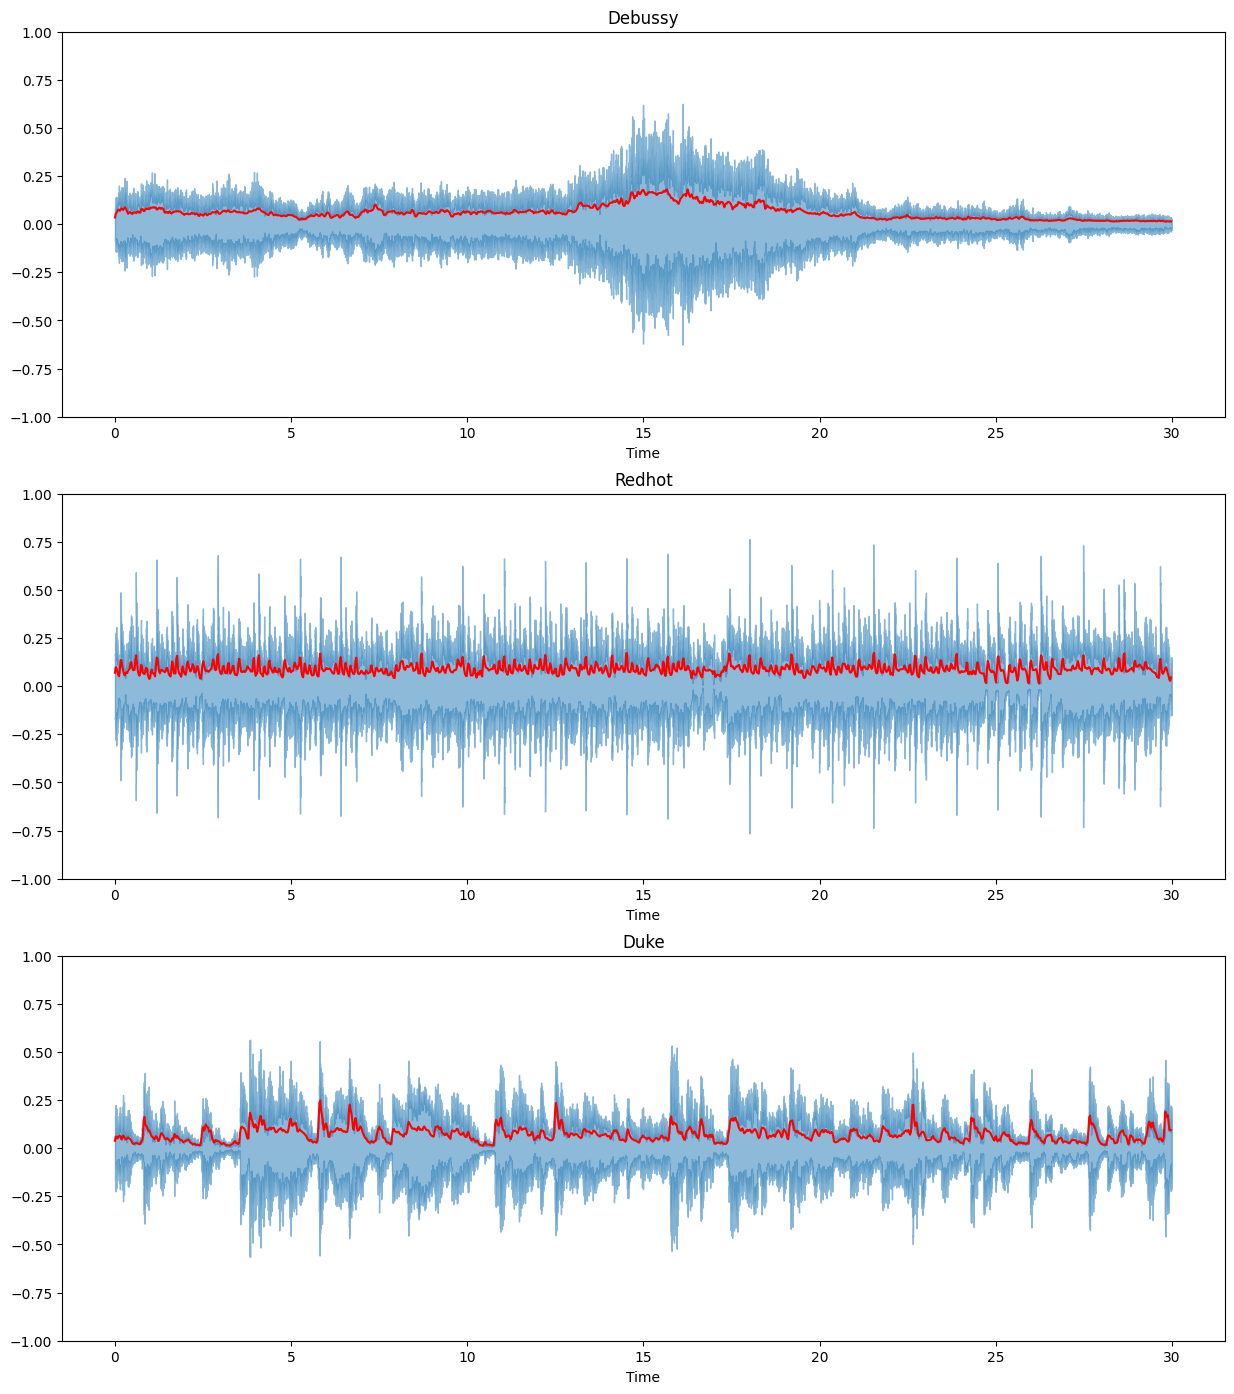

In [17]:

frames= range(len(rms_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t, rms_debussy, color="r")
plt.title("Debussy")
plt.ylim((-1, 1))

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t, rms_redhot, color="r")
plt.title("Redhot")
plt.ylim((-1, 1))

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t, rms_duke, color="r")
plt.title("Duke")
plt.ylim((-1, 1))

plt.show()

In [19]:
# RMSE from scratch
def rmse(signal, frame_size, hop_length):
    rmse = []
    
    # calculate rmse for each frame
    for i in range(0, len(signal), hop_length): 
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)  

In [20]:
rms1_debussy = rmse(debussy, frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH)
rms1_redhot = rmse(redhot, frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH)
rms1_duke = rmse(duke, frame_size=FRAME_LENGTH, hop_length=HOP_LENGTH)
print(rms1_debussy, rms1_debussy.size)

[0.05298566 0.05961848 0.0672015  ... 0.01489561 0.01443748 0.00890079] 1292


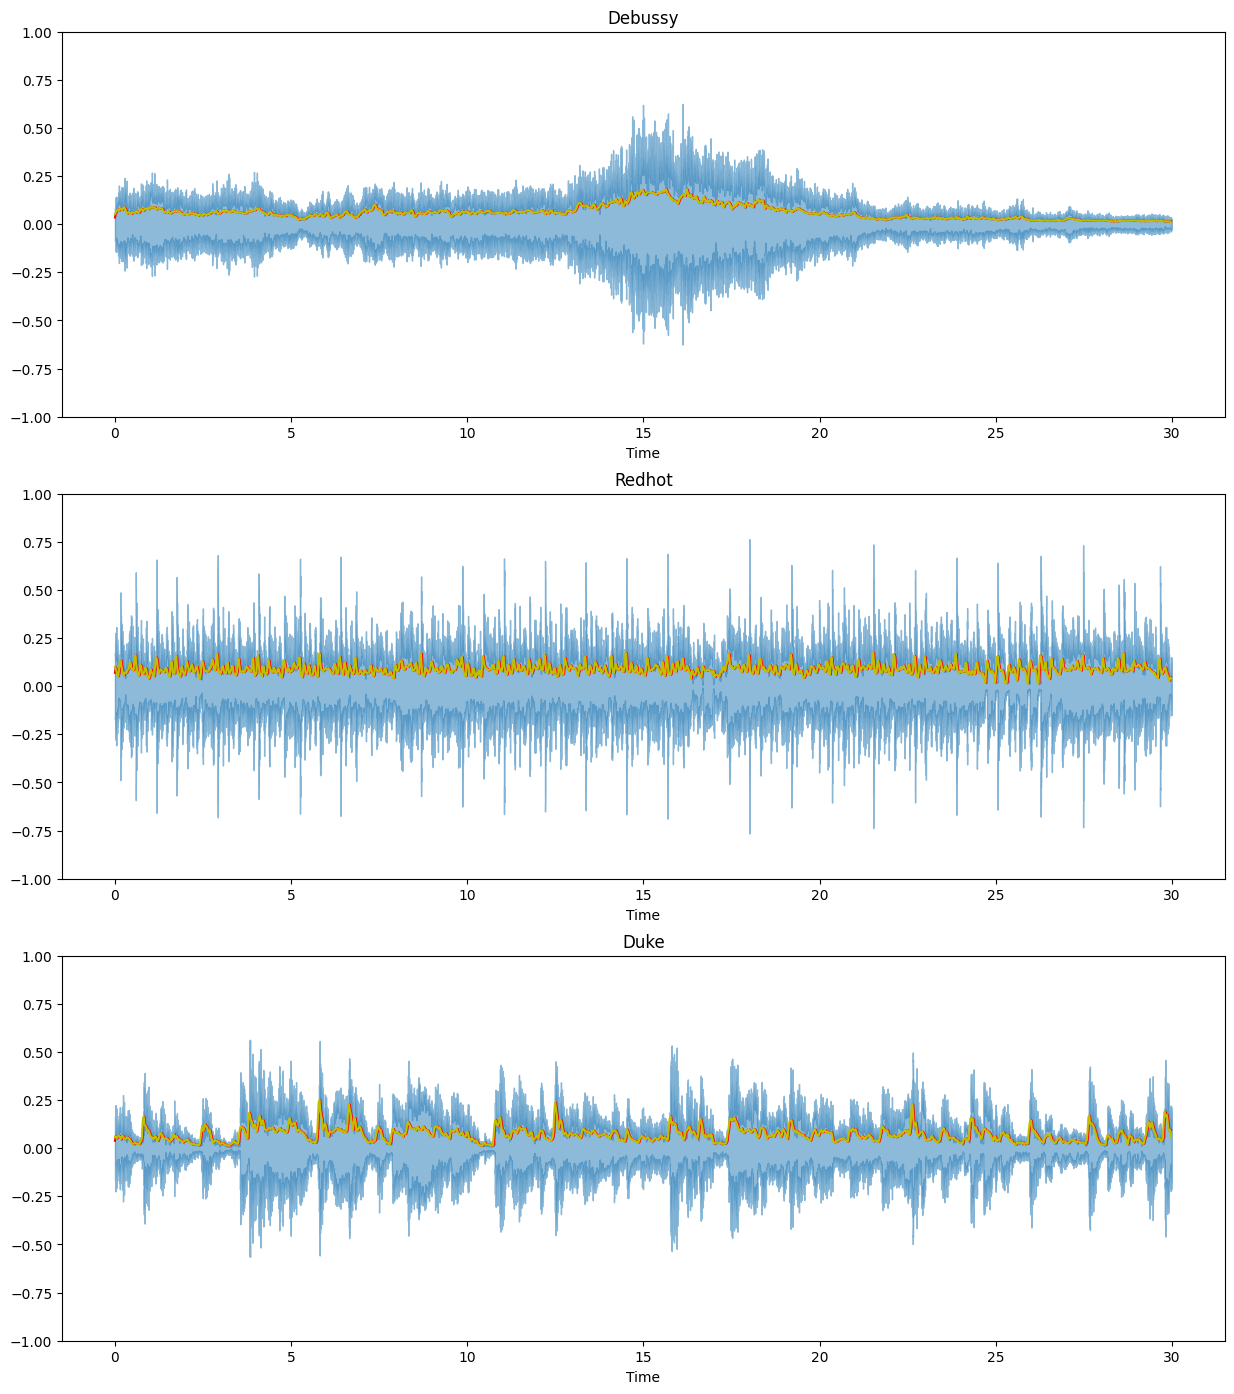

In [21]:
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t, rms_debussy, color="r")
plt.plot(t, rms1_debussy, color="y")
plt.title("Debussy")
plt.ylim((-1, 1))

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t, rms_redhot, color="r")
plt.plot(t, rms1_redhot, color="y")
plt.title("Redhot")
plt.ylim((-1, 1))

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t, rms_duke, color="r")
plt.plot(t, rms1_duke, color="y")
plt.title("Duke")
plt.ylim((-1, 1))

plt.show()

In [23]:
# zero crossing rate
zcr_debussy = librosa.feature.zero_crossing_rate(y=debussy, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_redhot = librosa.feature.zero_crossing_rate(y=redhot, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_duke = librosa.feature.zero_crossing_rate(y=duke, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_noise = librosa.feature.zero_crossing_rate(y=noise, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

zcr_duke

array([0.06835938, 0.1171875 , 0.09472656, ..., 0.03027344, 0.03027344,
       0.04394531])

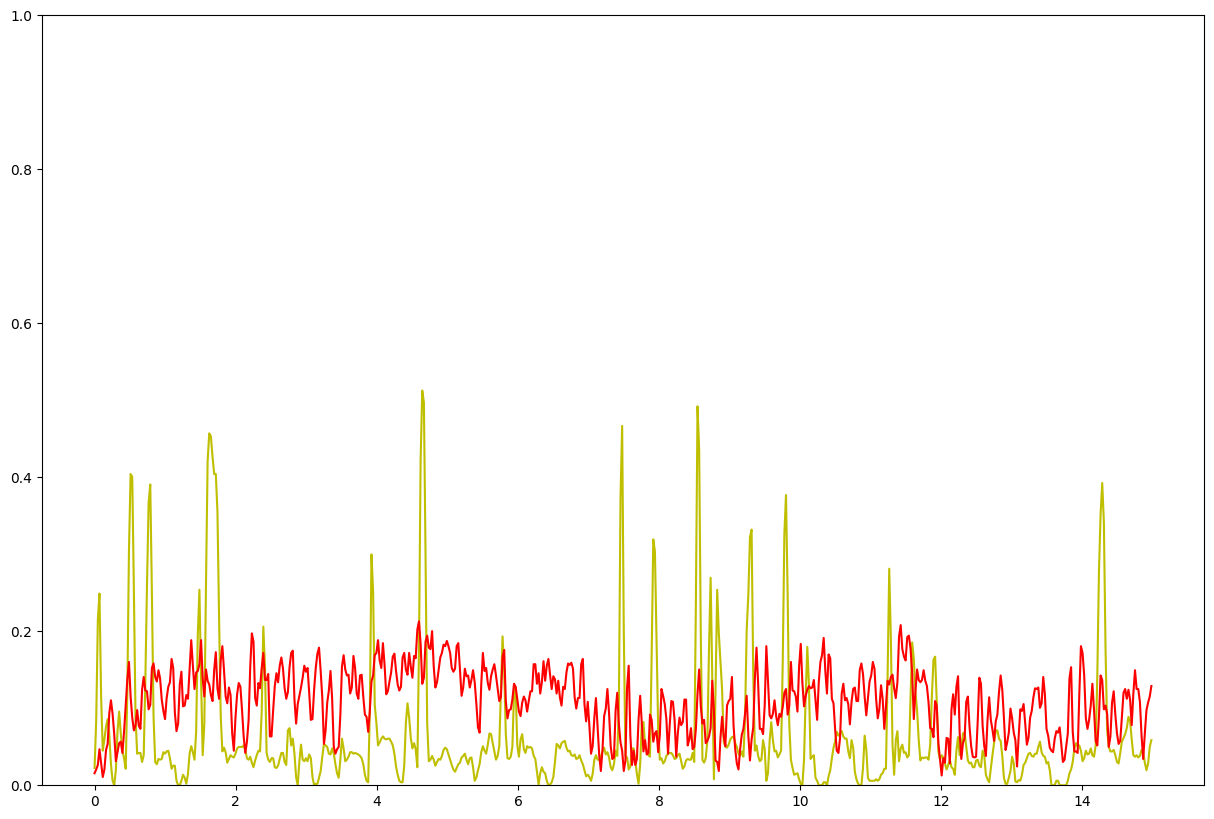

In [24]:
# visualize zcr
voice_file = "audio/voice.wav"
noise_file = "audio/noise.wav"

voice, _ = librosa.load(voice_file, duration=15)
noise, _ = librosa.load(noise_file, duration=15)



frame_noise = range(len(zcr_noise))
t_noise = librosa.frames_to_time(frame_noise, hop_length=HOP_LENGTH)

# get ZCR
zcr_voice = librosa.feature.zero_crossing_rate(y=voice, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_noise = librosa.feature.zero_crossing_rate(y=noise, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

frames = range(len(zcr_voice))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.figure(figsize=(15, 10))

plt.plot(t, zcr_voice, color="y")
plt.plot(t, zcr_noise, color="r")
plt.ylim(0, 1)
plt.show()


In [25]:
ipd.Audio(voice_file)

In [26]:
ipd.Audio(voice_file)